In [9]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import re
from matplotlib.ticker import MaxNLocator
import matplotlib.font_manager as font_manager
from matplotlib.ticker import FuncFormatter

# All scalability

In [10]:
TJ = {
    "TW":71.67,
    "SD":104,
    "GL5":4.83,
    "SQR'":6.90,
    "CW":589,
    "COS5":188.55,
}

In [11]:
def read_dt(file_name):
    f = open(file_name, 'r')
    lines = f.readlines()
    index = [idx for idx, s in enumerate(lines) if 'graph centered data' in s][0]
    data = dict()
    for l in lines[index+1:]:
        words = l.split(" ")
        g = words[0]
        if (g not in data):
            data[g]=dict()
        alg = words[1]
        data[g][alg]= [ TJ[g]/eval(i) for i in words[2:]]
    return data

In [133]:
# dt = read_dt('scale.txt')
dt = read_dt("scale.txt")

FileNotFoundError: [Errno 2] No such file or directory: 'scale.txt'

In [134]:
sns.color_palette('tab10')

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [135]:
def draw_scalability(data):
    font = font_manager.FontProperties(family='Arial',style='normal', size=14)
    fig, ax = plt.subplots(2,3, figsize=(9,3), sharex=True)
    fig.add_subplot(111, frameon=False)
    ax = ax.flatten()
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.15, hspace=0.25)
    colors = list(sns.color_palette('tab10'))
    x = [1, 4,12,24,48, 96,192]
    x_major = [1,4,24,48,96, 192]
    labels = ['1','2','4','8','24','96']
    x_minor = [12,48, 150]
    labels_minor=['12','48','96h']
    algorithms = ["VGC","GBBS","multi-step","iSpan"]
    i = 0
    _marker = "."
    _m_size = 4.5
    graphs = ["TW","SD","CW", "SQR'", "GL5", "COS5"]
    colors_map = {
        "VGC": colors[3],
        "GBBS":colors[0],
        "multi-step":colors[2],
        "iSpan":colors[4],
    }
    markers_map={
        "VGC":'o',
        "GBBS":'d',
        "multi-step":'v',
        'iSpan':'*',
    }
    for g in graphs:
        for a in data[g].keys():
            if (a == "VGC"):
                alpha_=1
            else:
                alpha_=0.5
            ax[i].plot(x, data[g][a], label=a, marker=markers_map[a],markersize=_m_size, color = colors_map[a], alpha = alpha_)
        ax[i].hlines(y=1, xmin = 0, xmax=155, linestyle=':', color='r')
        ax[i].set_title(g, fontname='Arial',fontsize=14, y=0.95)
        ax[i].tick_params(axis = 'y', pad = 0.1)
        ax[i].set_xscale('log', base = 2)
        ax[i].set_yscale('log', base = 2)
        ax[i].set_xticks(x_major, labels , fontsize=14, fontname='Arial', rotation = 60)
        ax[i].set_xticks(x_minor, labels_minor, minor=True, fontsize=14, fontname='Arial', rotation=60)
        ax[i].text(0.55,0.98, "{:.0f}".format(1),color='red', ha = 'left', va = 'center')
        formatter = FuncFormatter(lambda y, _: '{:.16g}'.format(y))
        ax[i].yaxis.set_major_formatter(formatter)
        if (g=='GL5'):
            ax[i].set_yticks([0.125, 0.5,2], ['','0.5','2'])
        if (g == "SQR'"):
            ax[i].set_ylim(bottom=0.01)
            ax[i].set_yticks([0.015625, 0.125,1], ['','0.125','1'])
        # show grid
        ax[i].grid(which='major', color='#CCCCCC', linewidth=1.1)
        ax[i].grid(which='minor', color='#CCCCCC', linestyle=':')
        i+=1        
    ax[1].legend(loc='upper right',bbox_to_anchor=(1.9,1.65), ncol=4, prop=font)
    plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
    plt.xlabel("number of cores", fontsize=14, labelpad=15)
    plt.ylabel("running time/Tarjan's", fontsize=14, labelpad=10)
    plt.savefig("SCC_scalability.pdf", bbox_inches='tight')
    plt.show()

In [136]:
draw_scalability(dt)

NameError: name 'dt' is not defined

# VGC scalability only

In [145]:
def read_file(file_name):
    f=open(f'{file_name}','r')
    lines = f.readlines()
    data = {}
    speedup = {}
    for l in lines:
        words = l.split(' ')
        g = words[0]
        data[g] = list(map(lambda x: eval(x), words[1:]))
        speedup[g]=data[g]
    return data,speedup

In [161]:
data, speedup = read_file('./../../tables/scale.txt')

In [162]:
data2, speedup2 = read_file('./../../tables/scale2.txt')

In [163]:
import matplotlib.pyplot as plt

def draw_scale(data, save_name):
    f, ax = plt.subplots(1, 1, sharex=True, figsize=(4, 2.5))
    markers = ['o', 's', 'v', '^', 'd', '*']
    
    for i, (g, values) in enumerate(data.items()):
        ax.plot([1, 2, 4, 12, 24, 48, 96, 192], values, label=f'{g}', marker=markers[i % len(markers)])
    
    ax.set_xscale('log', base=2)
    ax.set_yscale('log', base=2)

    ax.set_xticks([1, 2, 4, 12, 48, 96, 192])
    ax.set_xticklabels([1, 2, 4, 12, 48, 96, '96h'], fontsize=17, rotation=60)
    ax.set_yticks([1, 2, 4, 8, 16, 32, 64, 128])
    ax.set_yticklabels(['1', '2', '4', '8', '16', '32', '64', '128'], fontsize=17)

    plt.legend(loc='upper left', bbox_to_anchor=(-0.25, 1.3), ncol=4, fontsize=17, frameon=False,
               handletextpad=0.1, columnspacing=0.7, borderpad=0.4)
    
    f.text(0.5, -0.25, 'Number of Cores', ha='center', fontsize=20)
    f.text(-0.15, 0.5, 'Self Speedup', va='center', rotation='vertical', fontsize=20)

    plt.savefig(save_name, bbox_inches='tight')


In [173]:
def draw_scale_two(data1, data2, save_name):
    f, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(8, 2.5))
    markers = ['o', 's', 'v', '^', 'd', '*', 'p', 'h']
    
    for i, (g, values) in enumerate(data1.items()):
        ax1.plot([1, 2, 4, 12, 24, 48, 96, 192], values, label=f'{g}', marker=markers[i % len(markers)], markersize=8)
    
    for i, (g, values) in enumerate(data2.items()):
        ax2.plot([1, 2, 4, 12, 24, 48, 96, 192], values, label=f'{g}', marker=markers[i % len(markers) + 4], markersize=8)
    
    ax1.set_xscale('log', base=2)
    ax1.set_yscale('log', base=2)
    ax2.set_xscale('log', base=2)
    ax2.set_yscale('log', base=2)

    ax1.set_xticks([1, 2, 4, 12, 48, 192])
    ax1.set_xticklabels([1, 2, 4, 12, 48, '96h'], fontsize=16, rotation=0)
    ax1.set_yticks([1, 2, 4, 8, 16, 32, 64, 128])
    ax1.set_yticklabels(['1', '2', '4', '8', '16', '32', '64', '128'], fontsize=17)

    ax2.set_xticks([1, 2, 4, 12, 48, 192])
    ax2.set_xticklabels([1, 2, 4, 12, 48, '96h'], fontsize=16, rotation=0)
    ax2.set_yticks([1, 2, 4, 8, 16, 32, 64, 128])
    ax2.set_yticklabels(['1', '2', '4', '8', '16', '32', '64', '128'], fontsize=17)

    handles1, labels1 = ax1.get_legend_handles_labels()
    handles2, labels2 = ax2.get_legend_handles_labels()

    handles = handles1 + handles2
    labels = labels1 + labels2
    # add subtittle for ax1 and ax2
    ax1.set_title('dense graphs', fontsize=20, fontstyle='italic')
    ax2.set_title('sparse graphs', fontsize=20, fontstyle='italic')
    
    f.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=8, fontsize=17, frameon=False,
             handletextpad=0.1, columnspacing=0.7, borderpad=0.4)
    
    f.text(0.5, -0.12, 'Number of cores', ha='center', fontsize=20)
    f.text(0.02, 0.5, 'Self speedup', va='center', rotation='vertical', fontsize=20)

    plt.savefig(save_name, bbox_inches='tight')


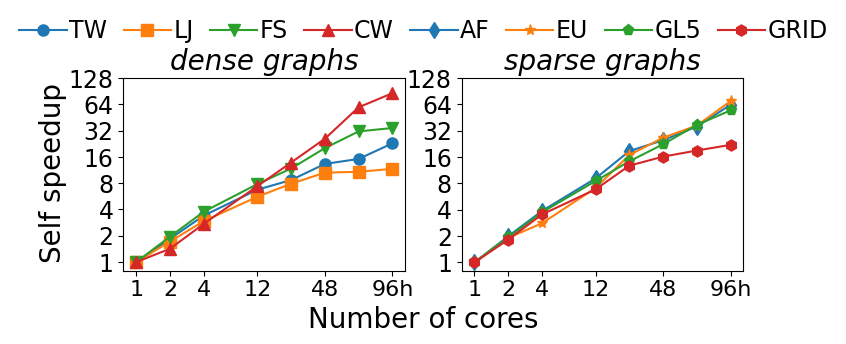

In [174]:
draw_scale_two(speedup, speedup2, 'scale.pdf')

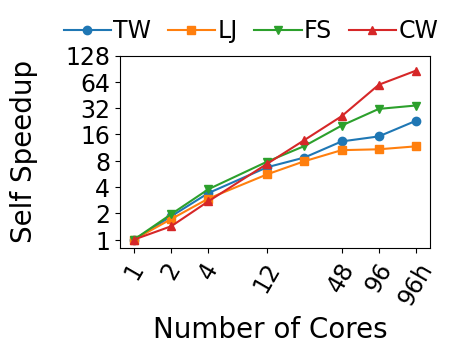

In [166]:
draw_scale(speedup, "scalability.pdf")

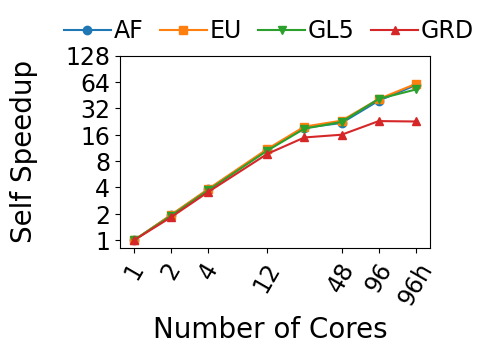

In [63]:
draw_scale(speedup2, "scalability2.pdf")